In [1]:
import os
import sys
import numpy as np

sys.path.append('/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats/src/statistics_collection')

import StatsAnalytics as sa
import StatsPlots as sp

In [2]:
# os.chdir('../../')
os.getcwd()

'/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats'

## 1. Load the tissue dataframes

In [3]:
# Load dataframes
out_root_path = '../outputs/outputs_v2'
df_files = [
    'output_bladder_control_curated_segmentation_s_10_e_6_d_8/cell_stats/stats_dataset_bladder.csv',
    'output_esophagus_Z2_curated_crop_s_10_e_6_d_8/cell_stats/stats_dataset_esophagus.csv',
    'output_intestine_sample2_b_curated_segmentation_relabel_seq_s_10_e_6_d_8/cell_stats/stats_dataset_intestine_villus.csv',
    'output_lung_new_sample_b_curated_segmentation_central_crop_relabel_seq_s_10_e_6_d_8/cell_stats/stats_dataset_lung_bronchiole.csv'
]
df_paths = [os.path.join(out_root_path, df_file) for df_file in df_files]

cell_stats_df = sa.prepare_df(paths_to_dfs=df_paths)
cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,neighbors_2D,...,slices,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area,num_neighbors_2D
0,1,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,False,1.076577,0.017199,"[536, 558]","[[536, 558]]",...,[327],4218.218190,2,1.296384,[6.30024209e-10 5.40020764e-10 1.00000000e+00],1.000000,"[1.07657712, 1.07657712]",1.076577,2.153154,[2]
1,2,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...",...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...",...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...",...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,False,1159.586833,2391.434955,"[3, 32, 34, 47, 61, 70, 73, 80, 82, 106, 132, ...","[[3, 561, 563], [3, 561, 563], [3, 561, 563], ...",...,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",272.641950,16,1.532248,[-0.61445824 -0.74901947 -0.24781225],1.000000,"[144.67997845, 51.55171865, 214.864143, 53.890...",103.785304,1660.564861,"[3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,176,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,False,445.255056,478.487852,"[105, 114, 125, 129, 148, 169, 170, 173]","[[125, 170], [125, 129, 170], [125, 129, 170],...",...,"[165, 166, 167, 168, 169, 170, 171, 172, 173, ...",385.553588,8,1.270606,[-0.00389311 0.9183728 0.39569717],0.873589,"[4.1394466, 74.94009204, 135.47485977, 77.7869...",62.304793,498.438341,"[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
1265,177,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,False,691.025208,1204.963398,"[10, 22, 27, 60, 67, 69, 71, 178, 179]","[[22, 179], [22, 179], [22, 179], [22, 179], [...",...,"[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...",227.265735,9,1.141860,[ 0.70097 -0.69764424 0.14809991],0.838381,"[61.83304064, 176.45099907, 110.61104816, 3.08...",79.950886,719.557975,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ..."
1266,178,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,False,471.400474,574.256719,"[10, 12, 22, 27, 60, 61, 67, 69, 177, 180]","[[10, 177], [10, 177], [10, 177], [10, 177], [...",...,"[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 7...",317.656593,10,1.640184,[ 0.50206321 -0.79068915 -0.35034727],0.941212,"[116.87856957, 140.8240357, 1.12069996, 76.901...",57.898084,578.980842,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, ..."
1267,179,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...",...,"[0, 1,

## 2. Process dataframe (outlier detection, numerical features extraction, standardization, ...)

In [4]:
# Rename columns
cell_stats_df = sa.rename_features(
    df=cell_stats_df,
    old_names=['area'],
    new_names=['surface_area']
)

In [5]:
# Outlier detection
cell_stats_df = sa.detect_outliers(df=cell_stats_df, quantile_level=0.025)

Found a total of 20 volume outliers in bladder sample,
of which:
    - Below lower bound: 10,
    - Above upper bound: 10. 
        
Found a total of 4 volume outliers in esophagus sample,
of which:
    - Below lower bound: 2,
    - Above upper bound: 2. 
        
Found a total of 12 volume outliers in intestine_villus sample,
of which:
    - Below lower bound: 6,
    - Above upper bound: 6. 
        
Found a total of 8 volume outliers in lung_bronchiole sample,
of which:
    - Below lower bound: 4,
    - Above upper bound: 4. 
        


In [17]:
# Extract dataframe with only ids and numerical features to make it more handy for plotting
# The function also remove NA's
numeric_cell_stats_df = sa.extract_numerical(
    df=cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ],
    remove_na = True
)

Dropped 438 records containing NAs.


In [18]:
# Get standardized dataset (only numerical features)
std_cell_stats_df = sa.standardize(
    df=numeric_cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ]
)
std_cell_stats_df

,cell_ID,tissue,tissue_type,exclude_cell,volume,isoperimetric_ratio,num_neighbors,elongation,contact_area_fraction,mean_contact_area,surface_area,is_outlier
0,1,bladder,stratified_transitional,False,-1.005087,18.506601,-2.300919,-0.892894,1.052630,-1.658813,-1.601815,True
4,5,bladder,stratified_transitional,False,-0.113122,-0.177780,1.285962,-0.375947,1.052630,-0.446581,-0.090946,False
14,15,bladder,stratified_transitional,False,-0.428137,0.412934,1.029756,0.507013,1.052630,-0.452827,-0.320797,False
33,34,bladder,stratified_transitional,False,0.076376,-0.165061,0.517345,-0.378132,1.052630,-0.015034,0.121924,False
48,49,bladder,stratified_transitional,False,-0.198429,-0.023553,0.773550,0.477086,1.052630,-0.305272,-0.134765,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,175,lung_bronchiole,simple_cuboidal,False,-0.701171,0.522586,-1.276096,-0.529931,-0.111352,-0.232233,-0.750820,False
1264,176,lung_bronchiole,simple_cuboidal,False,-0.826625,0.356916,-0.763684,-0.949392,-0.305052,-0.936160,-1.022540,False
1265,177,lung_bronchiole,simple_cuboidal,False,-0.555660,-0.392660,-0.507479,-1.231567,-0.683187,-0.727890,-0.702020,False
1266,178,lung_bronchiole,simple_cuboidal,False,-0.790904,0.035388,-0.251273,-0.139381,0.421233,-0.988171,-0.988443,False


## 3. Make plots

For all the plotting function we would need a list of the numerical features of the dataframe to plot. <br>
We also need specify a path to a directory in which to save all the plots.

In [19]:
numerical_features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'num_neighbors', 'elongation',
    'contact_area_fraction', 'mean_contact_area'
] # here you can also set the order of variables for the plots
save_plots_dir = '../images/'

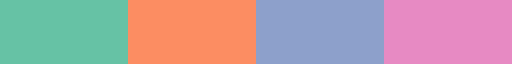

In [20]:
# Create a discrete colormap for plots (not used for correlation matrix)
# Note: in the plotting functions you can either choose a used defined cmap like this one,
# or a normal matplotlib colormap defined by a string (e.g., 'viridis')
colors = np.array([
    [102,194,165],
    [252,141,98],
    [141,160,203],
    [231,138,195]
]) / 255
cell_cmap = sp.create_cmap(color_list = colors)
cell_cmap

### 3.1. Correlation Matrix

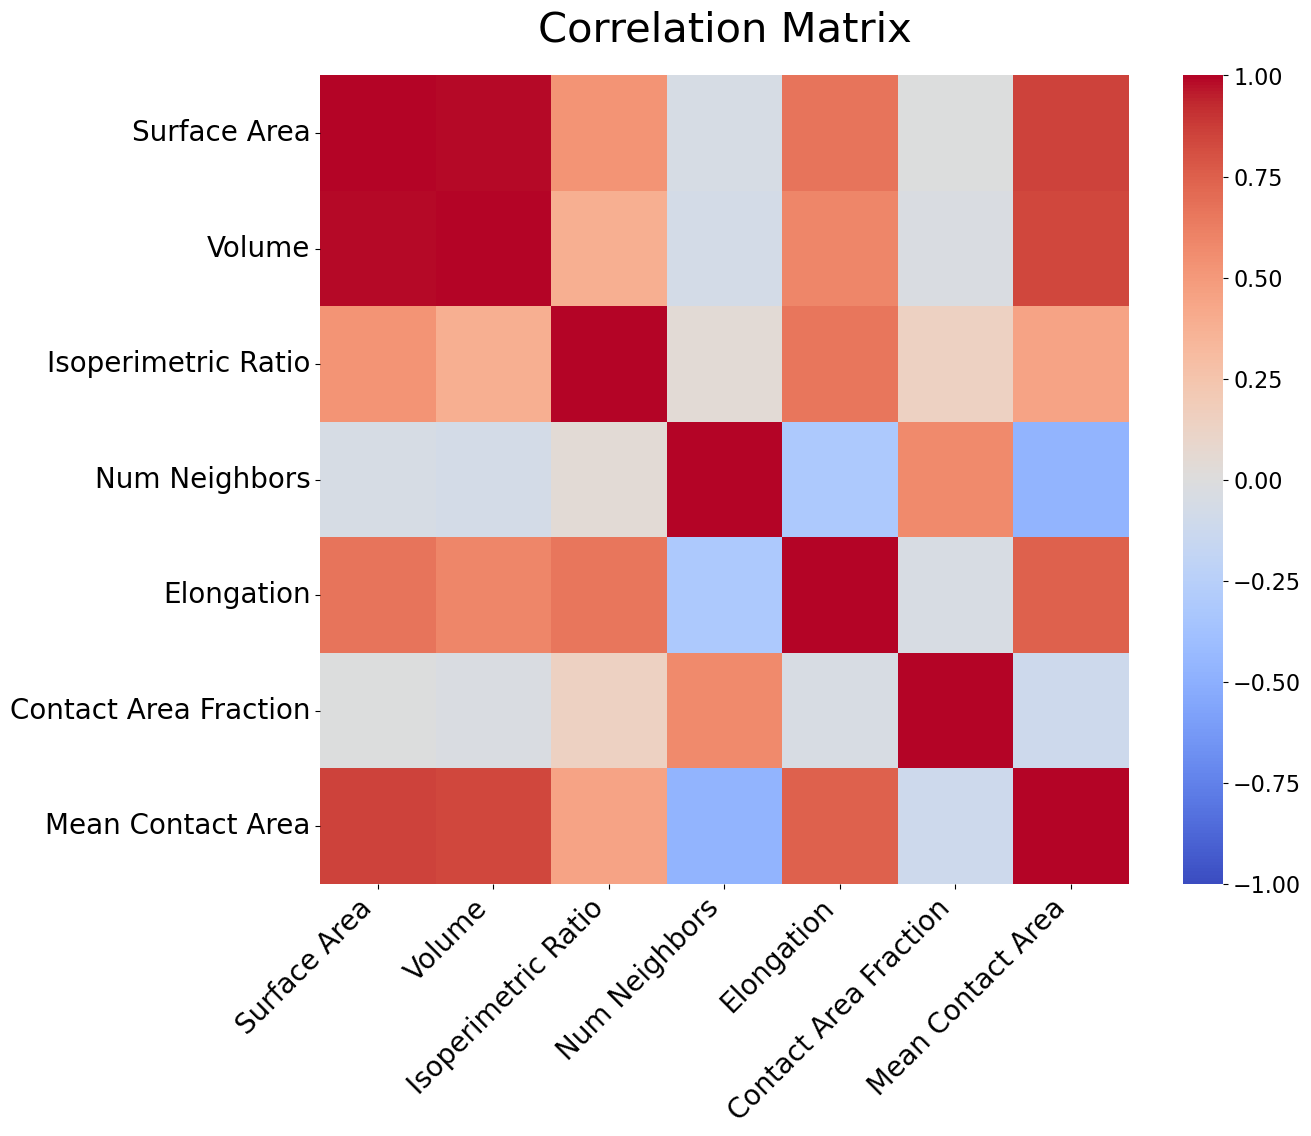

In [22]:
sp.corr_matrix_plot(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=True,
    color_map = 'coolwarm',
    save_dir=save_plots_dir,
    show=True
)

### 3.2. PCA plots

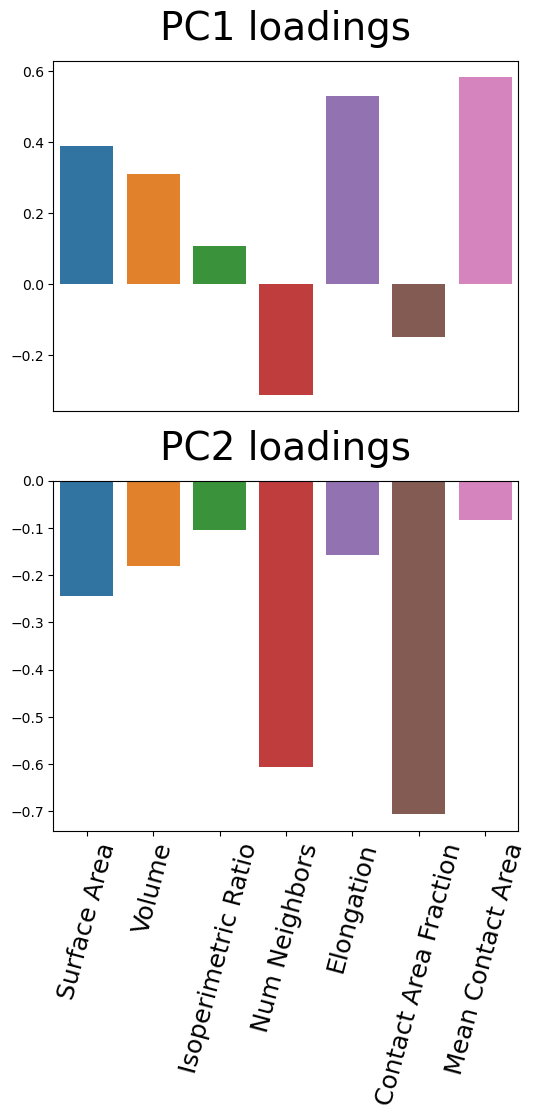

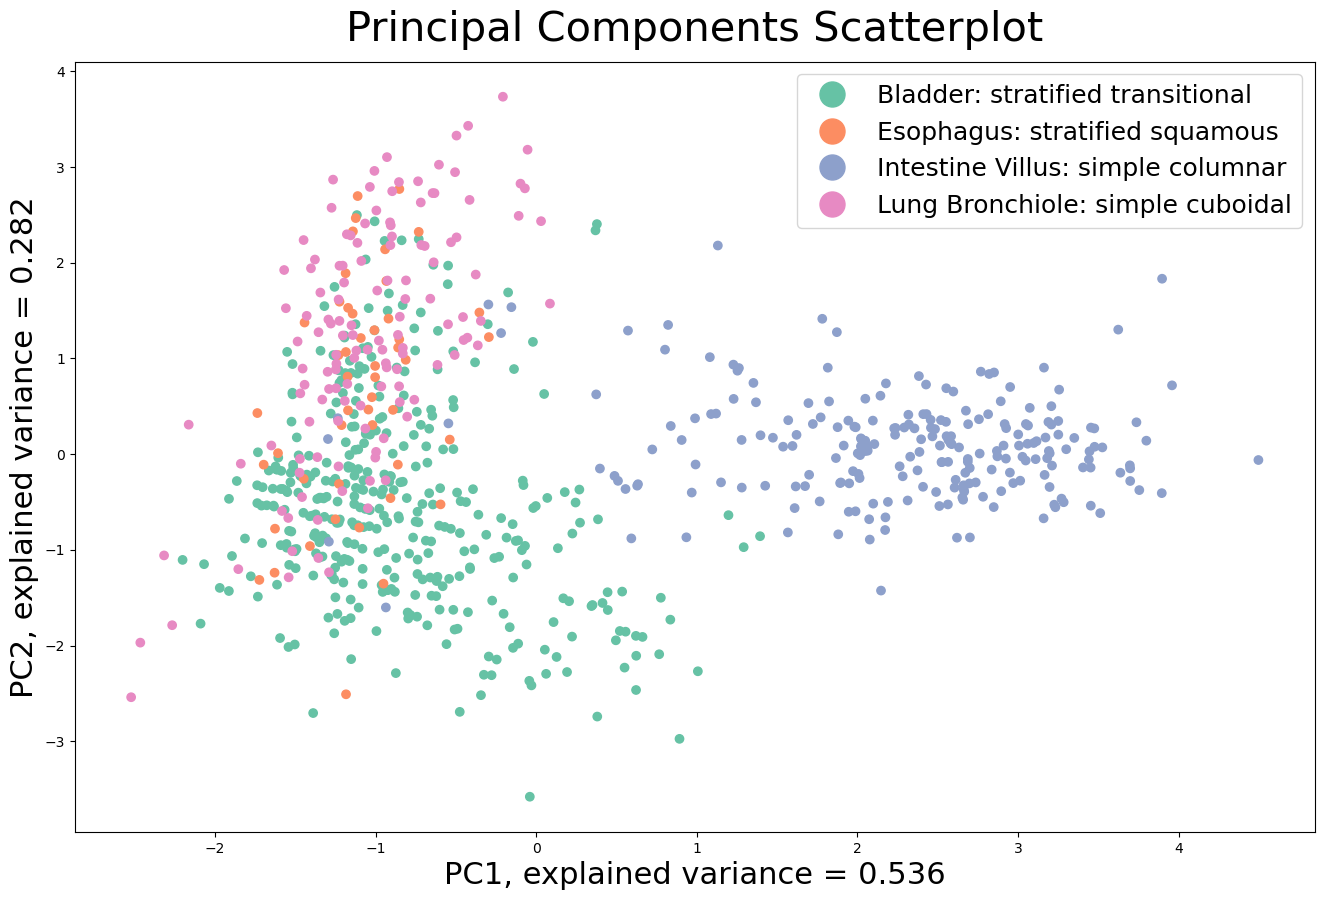

In [23]:
sp.pca_plots(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=True,
    color_map = cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.3. Grid of kdplots for different numerical features

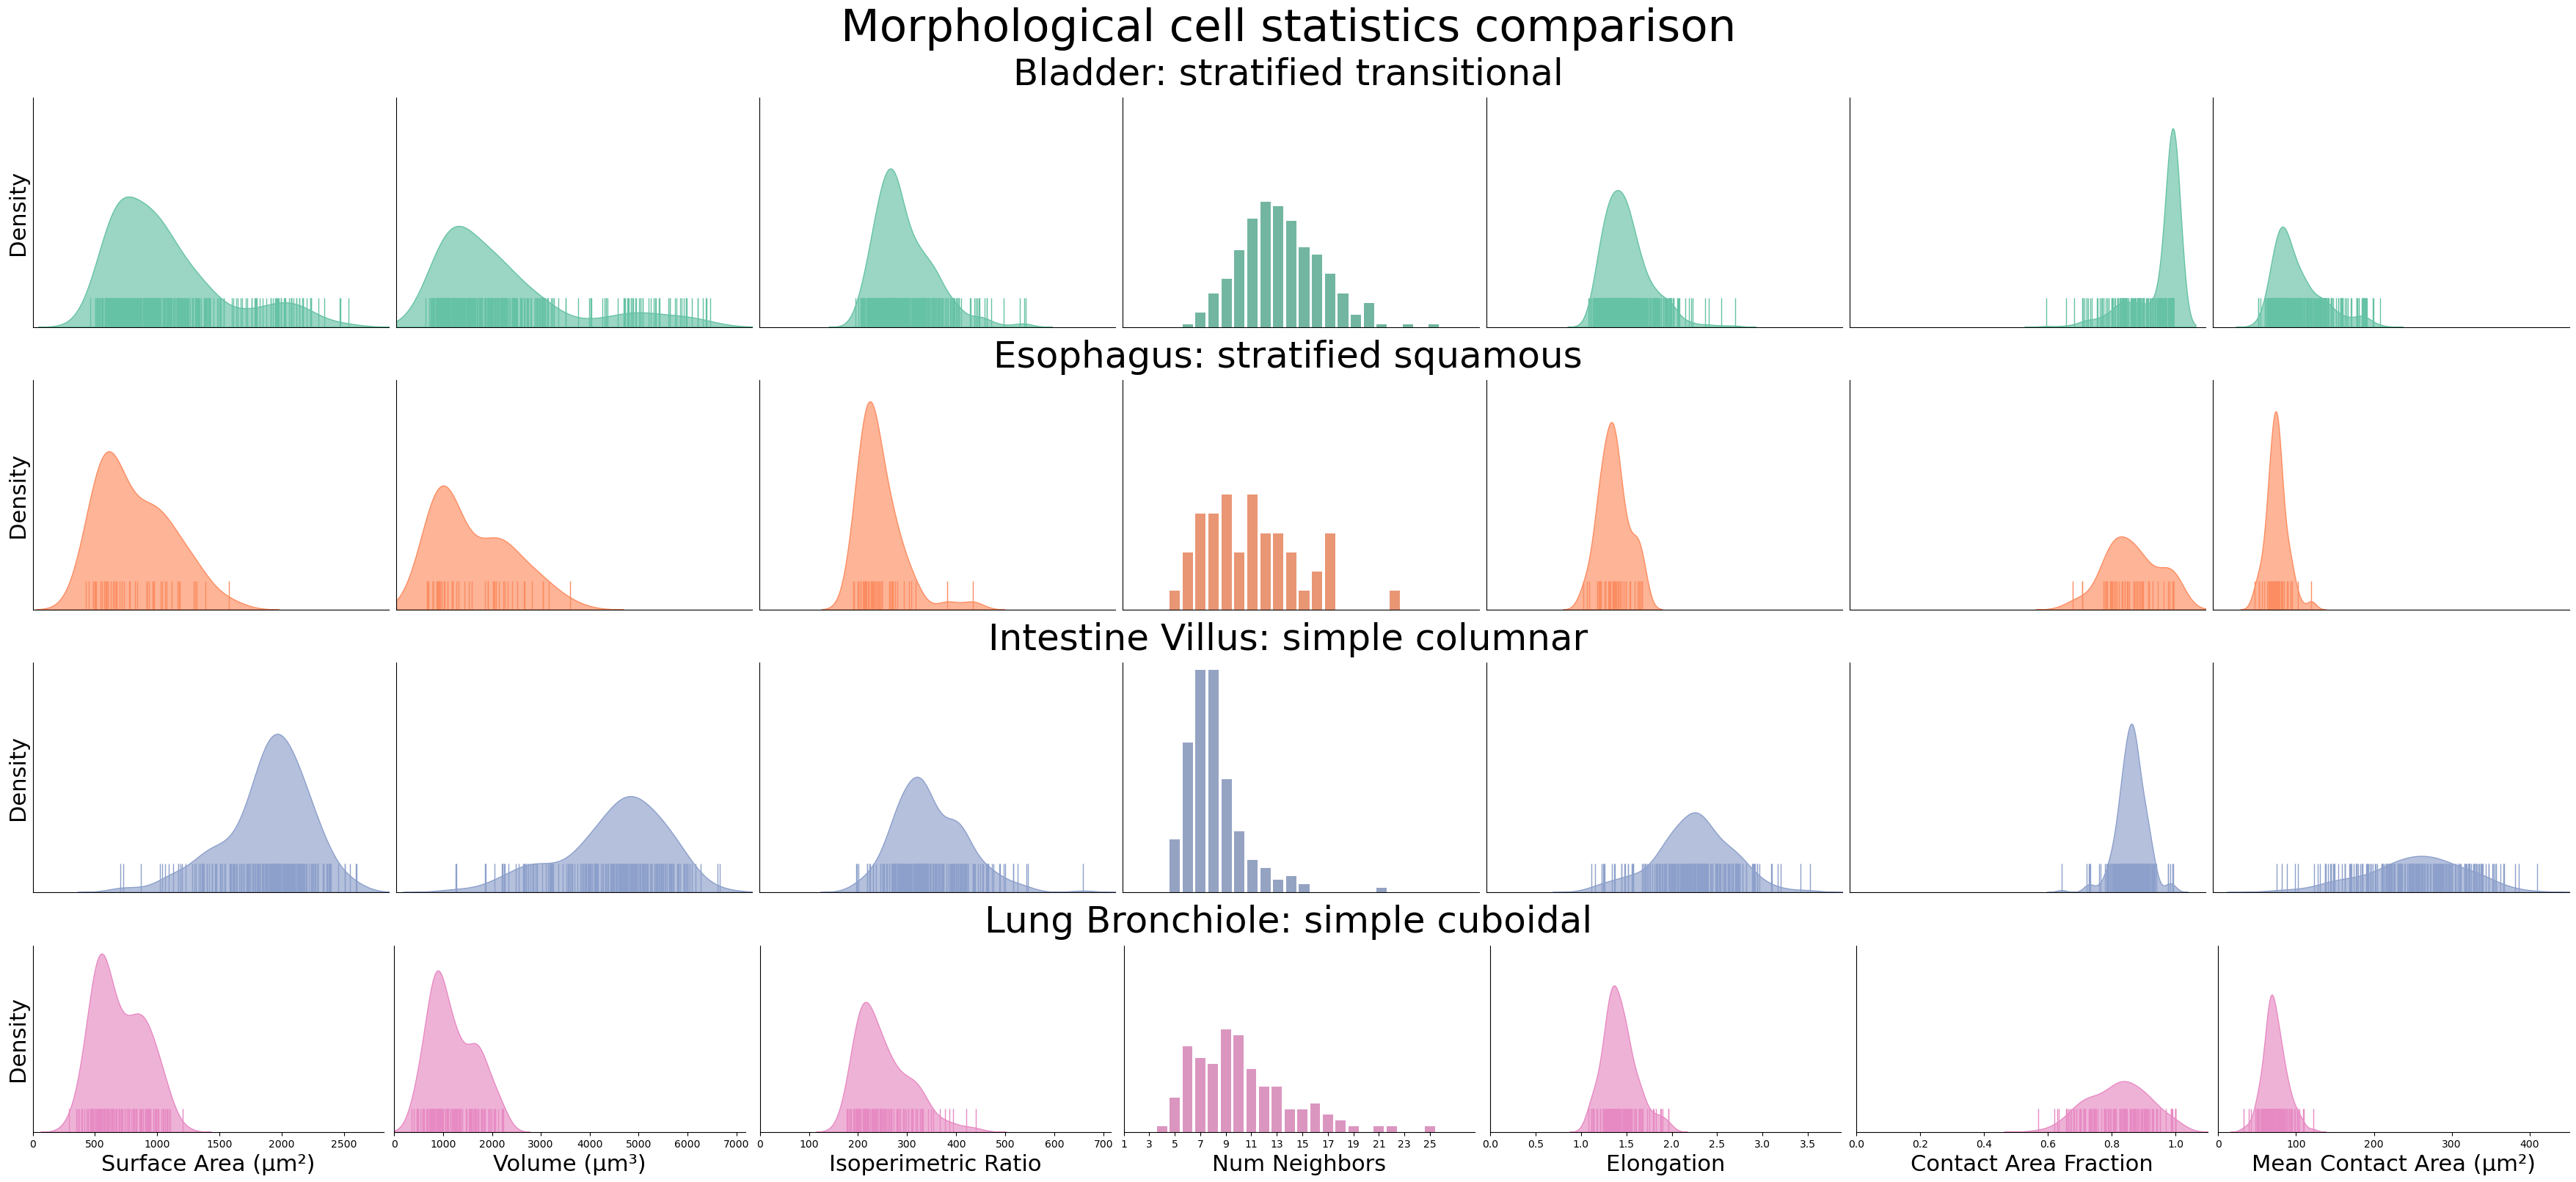

In [24]:
uoms = [
    '\u00B5m' + '\u00B2', 
    '\u00B5m' + '\u00B3', 
    None, 
    None,
    None,
    None,
    '\u00B5m' + '\u00B2'
]

y_lims = [0.002, 0.0010, 0.012, 0.25, 3.0, 14, 0.040]

sp.features_grid_kdplots(
    df=numeric_cell_stats_df,
    features=numerical_features,
    y_lims=y_lims,
    remove_outliers=True,
    units_of_measure=uoms,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.4. Number of neighbors barplots

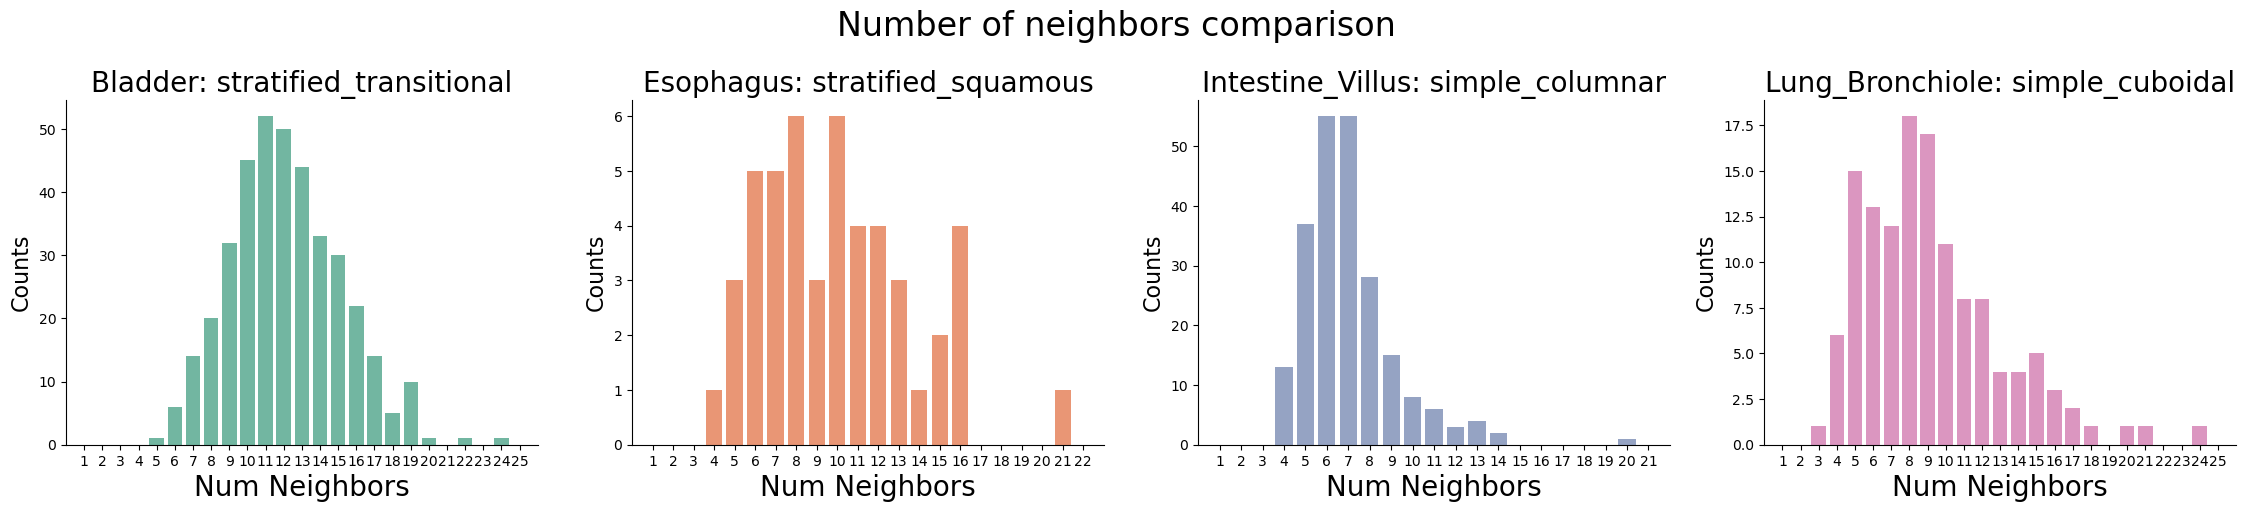

In [13]:
sp.num_neighbors_barplots(
    df=numeric_cell_stats_df,
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.5. Lewis' Law plots

Lewis' law states that the average apical area of cells having $n$ neighbors $\bar{A}_n$ is linearly related to the number of neighbors $n$ itself. $\newline$
In particular we have the following relation:
$$ \frac{\bar{A}_n}{\bar{A}} = \frac{n - 2}{4} $$
In 3D we could have a similar relation for volumes, namely:
$$ \frac{\bar{V}_n}{\bar{V}} \sim n $$


/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats/src/statistics_collection/StatsPlots.py:684: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  tissue: str,


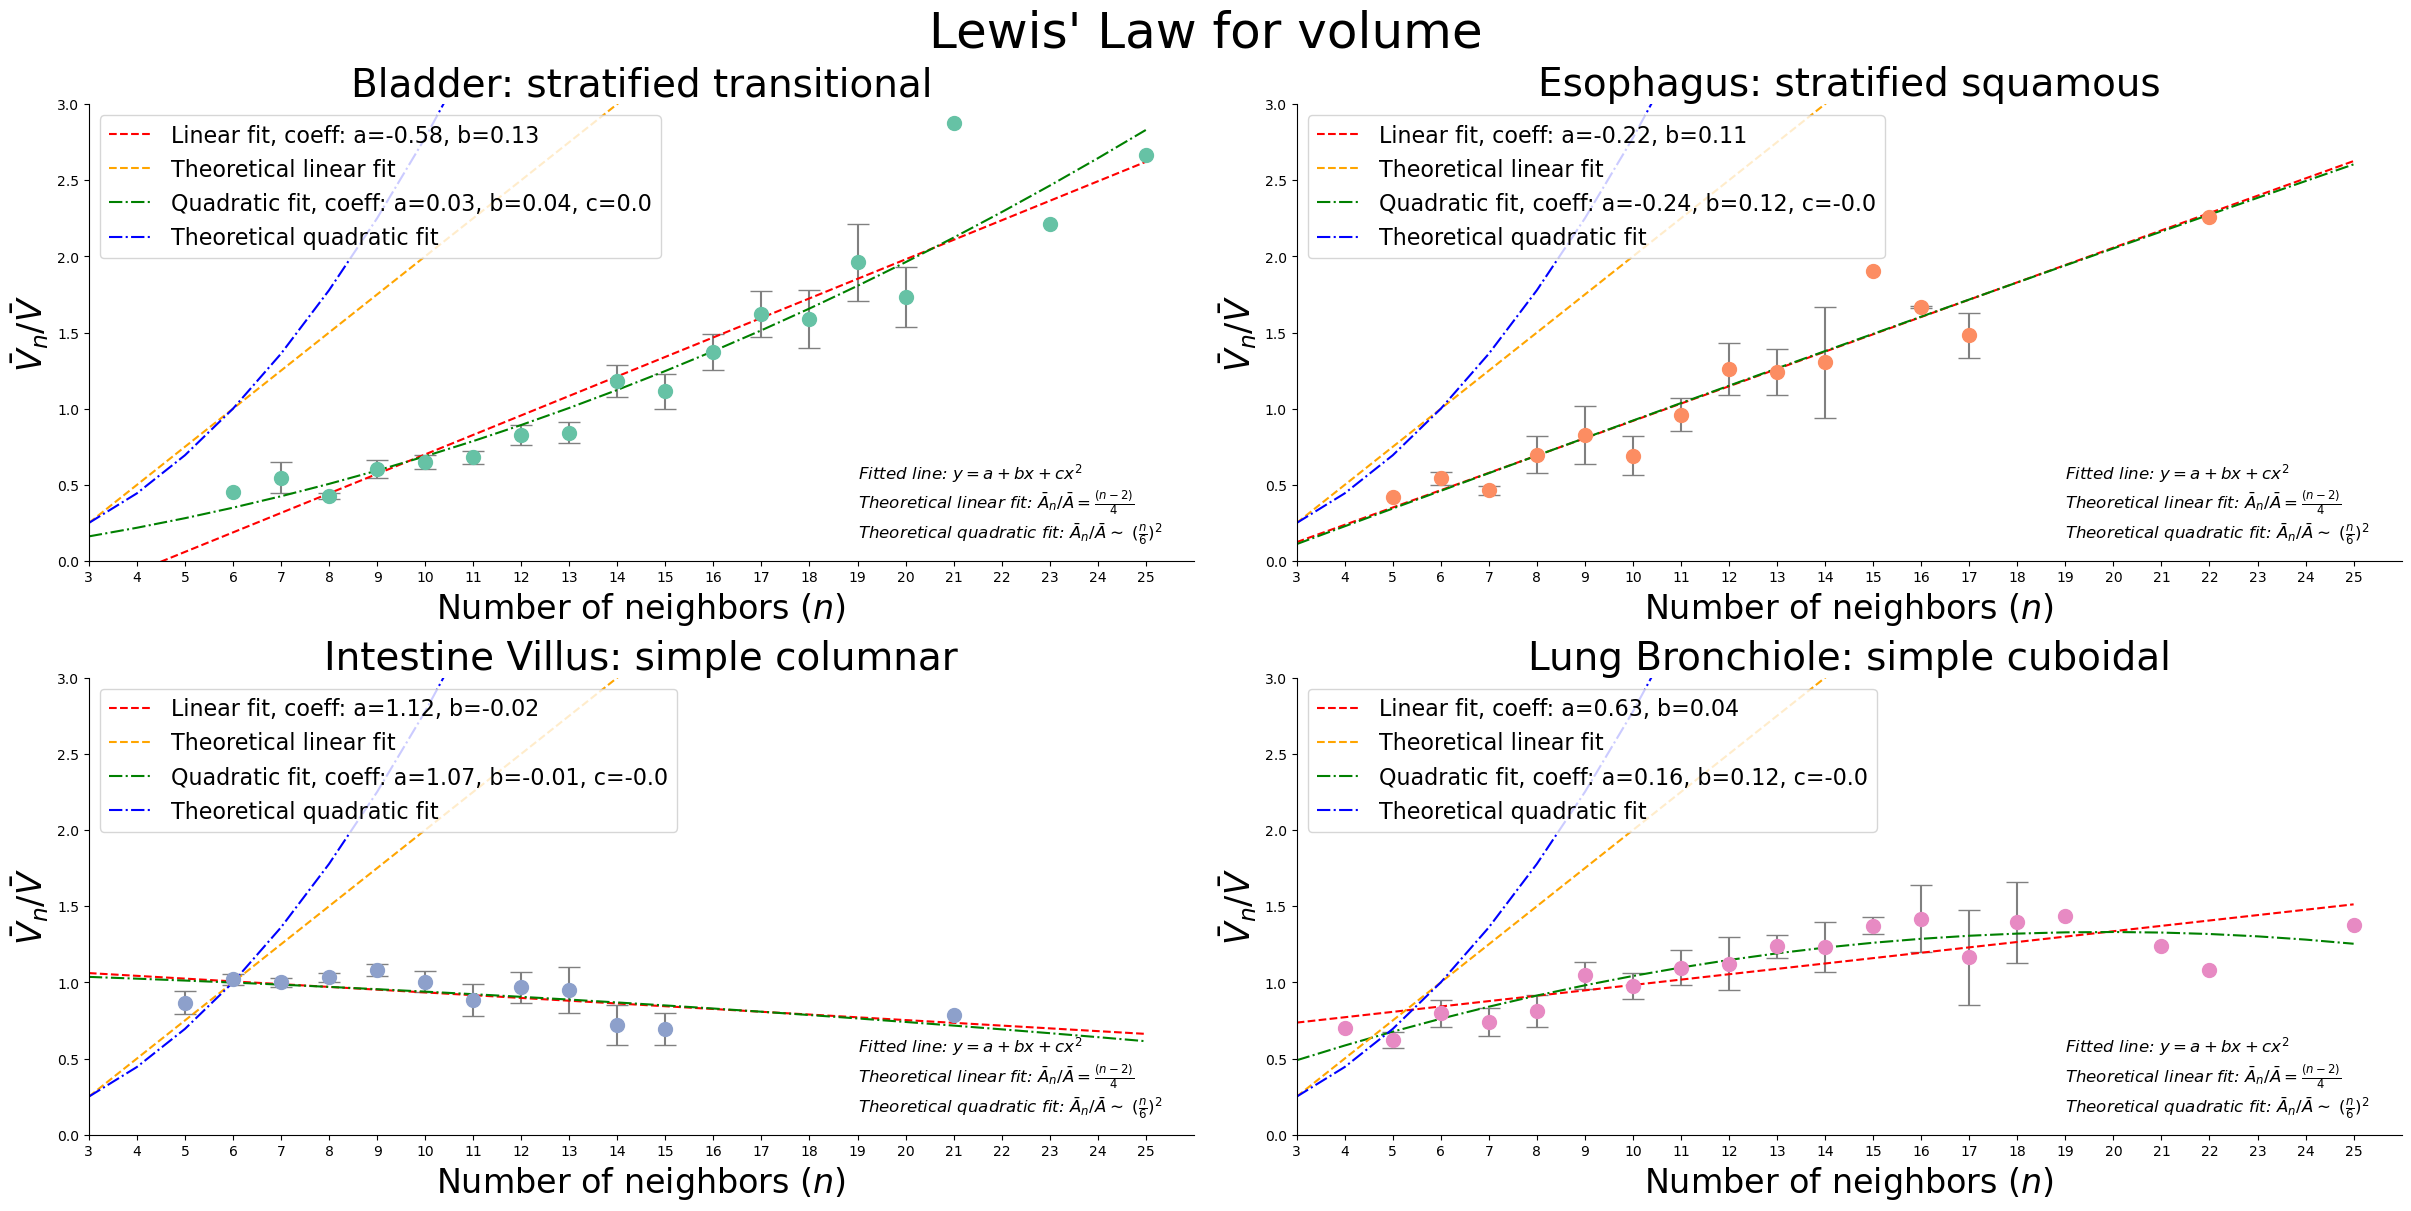

In [50]:
sp.lewis_law_plots(
    df=numeric_cell_stats_df,
    feature='volume',
    fit_degrees=[1,2],
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

## 3.6. Violin Plots for individual samples

In [ ]:
sp.violin_plots(
    df=numeric_cell_stats_df, 
    tissue='bladder',
    features=numerical_features,
    units_of_measure='m',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=None, 
    show=True
)

## 3.7. Code for 2D statistics plots

Notes:
- Exclude from computations cells that have less than 3 neighbors (not realistic cases).
- Gather the cell areas depending on the relative number of neighbors.

### 3.7.1. Lewis Law plots

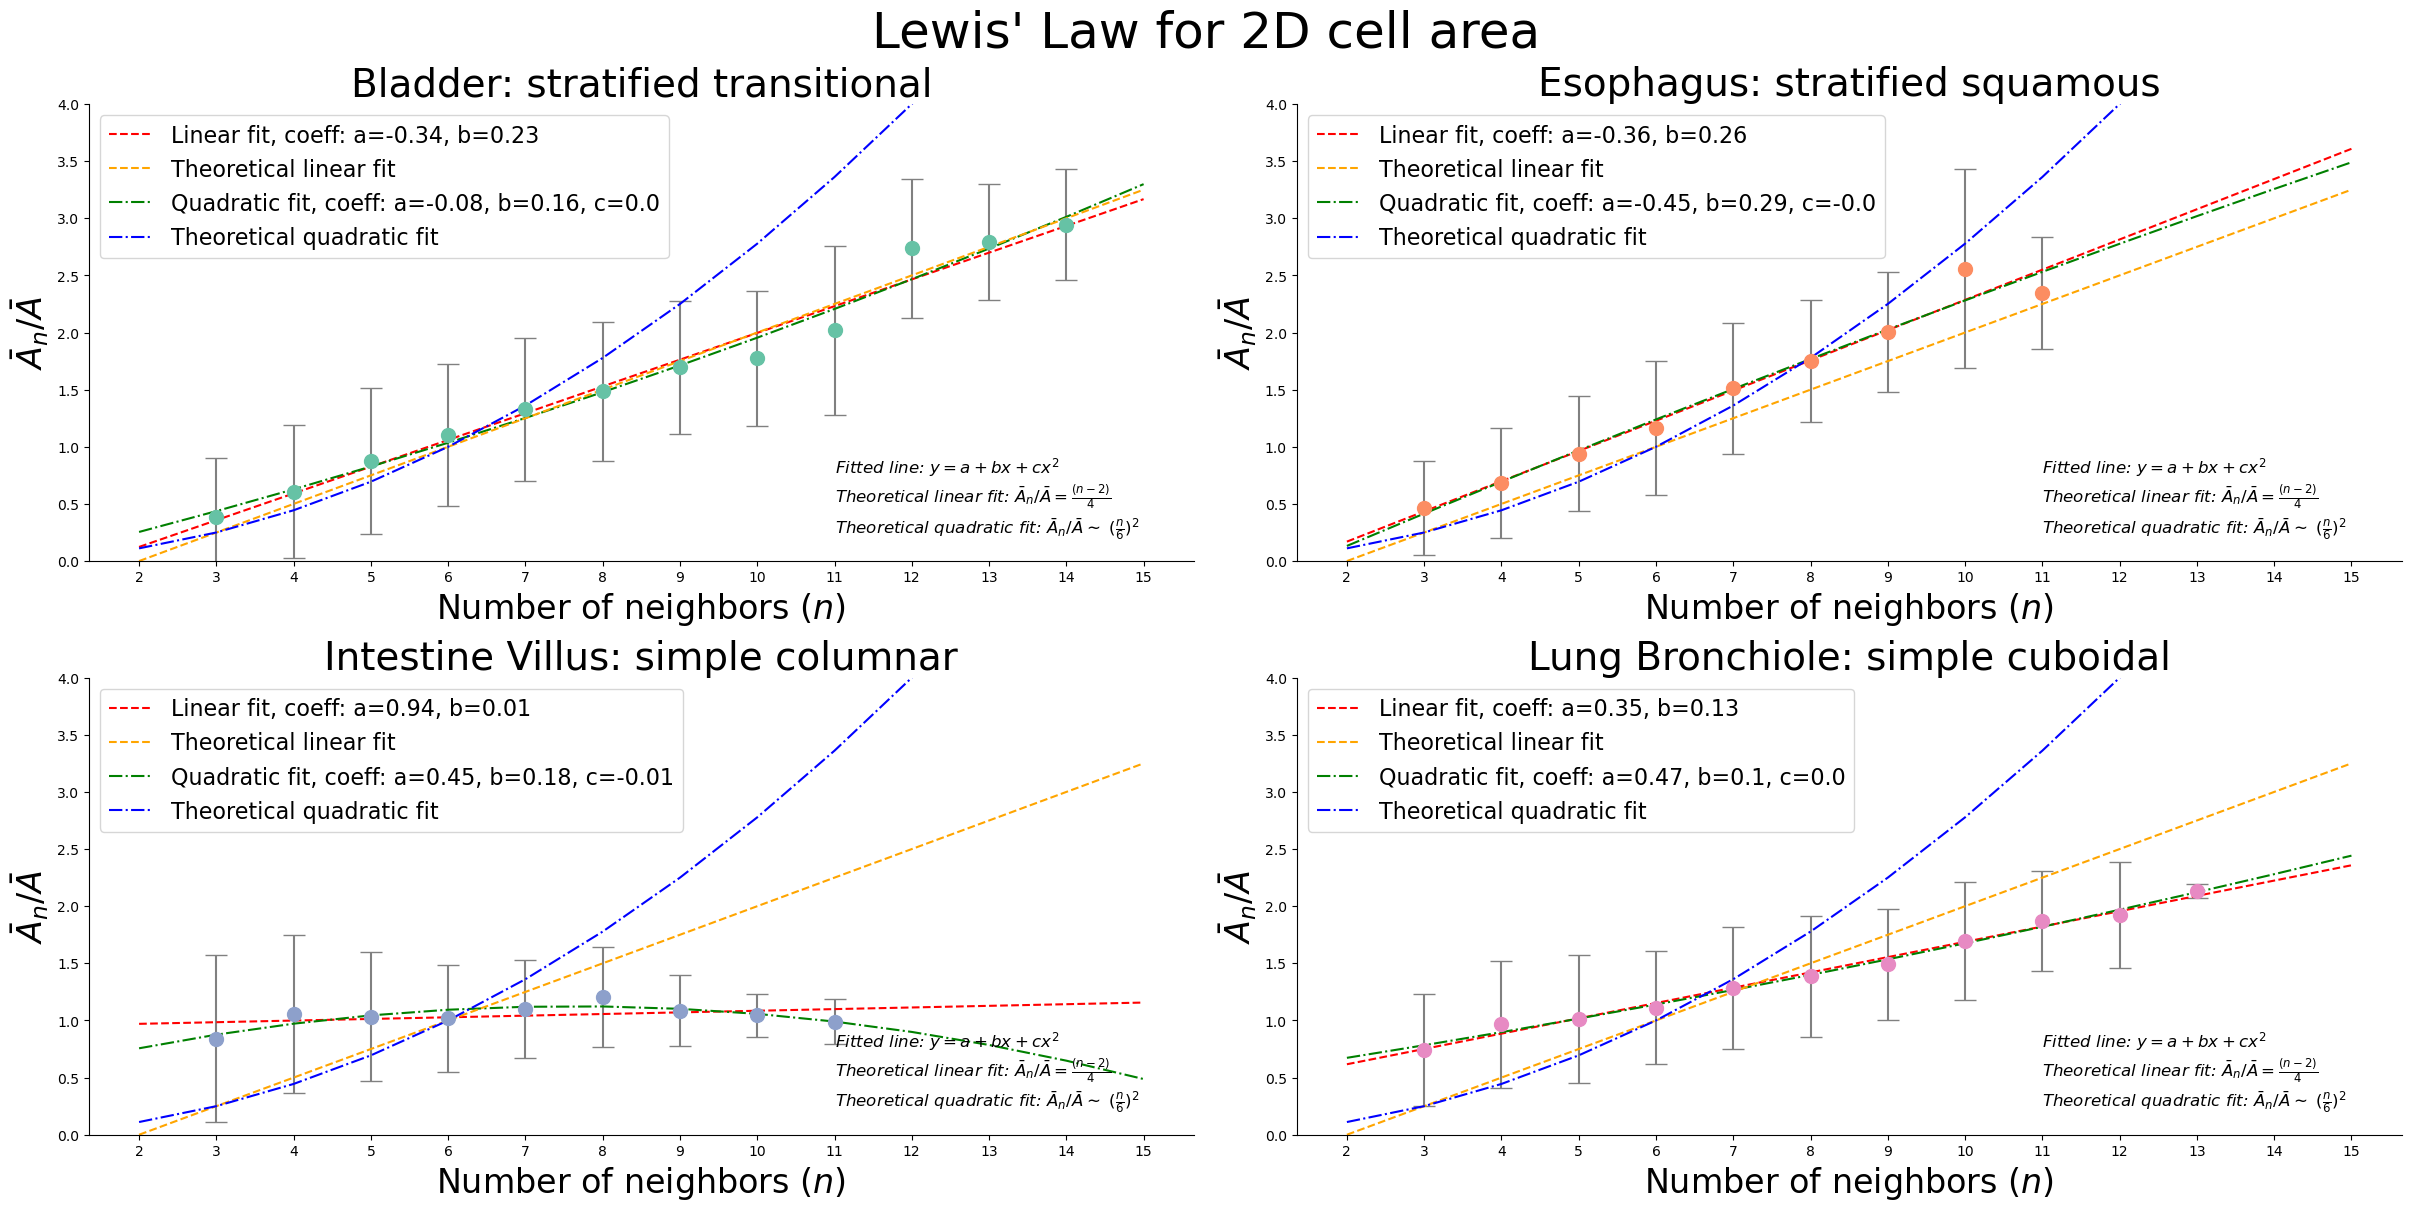

In [49]:
sp.lewis_law_2D_plots(
    df=cell_stats_df,
    fit_degrees=[1,2],
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir, 
    show=True
)

### 3.7.2. Aboav-Weaire Law plots

The Aboav-Weaire law states that the average number of neighbours of all n cells that border a cell with n neighbours follows:

$$ m(n) = 5 + \frac{8}{n}$$

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: bladder
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 618/618 [00:44<00:00, 13.88it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: esophagus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 125/125 [00:02<00:00, 43.37it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: intestine_villus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 310/310 [00:23<00:00, 13.40it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung_bronchiole
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 172/172 [00:10<00:00, 16.60it/s]


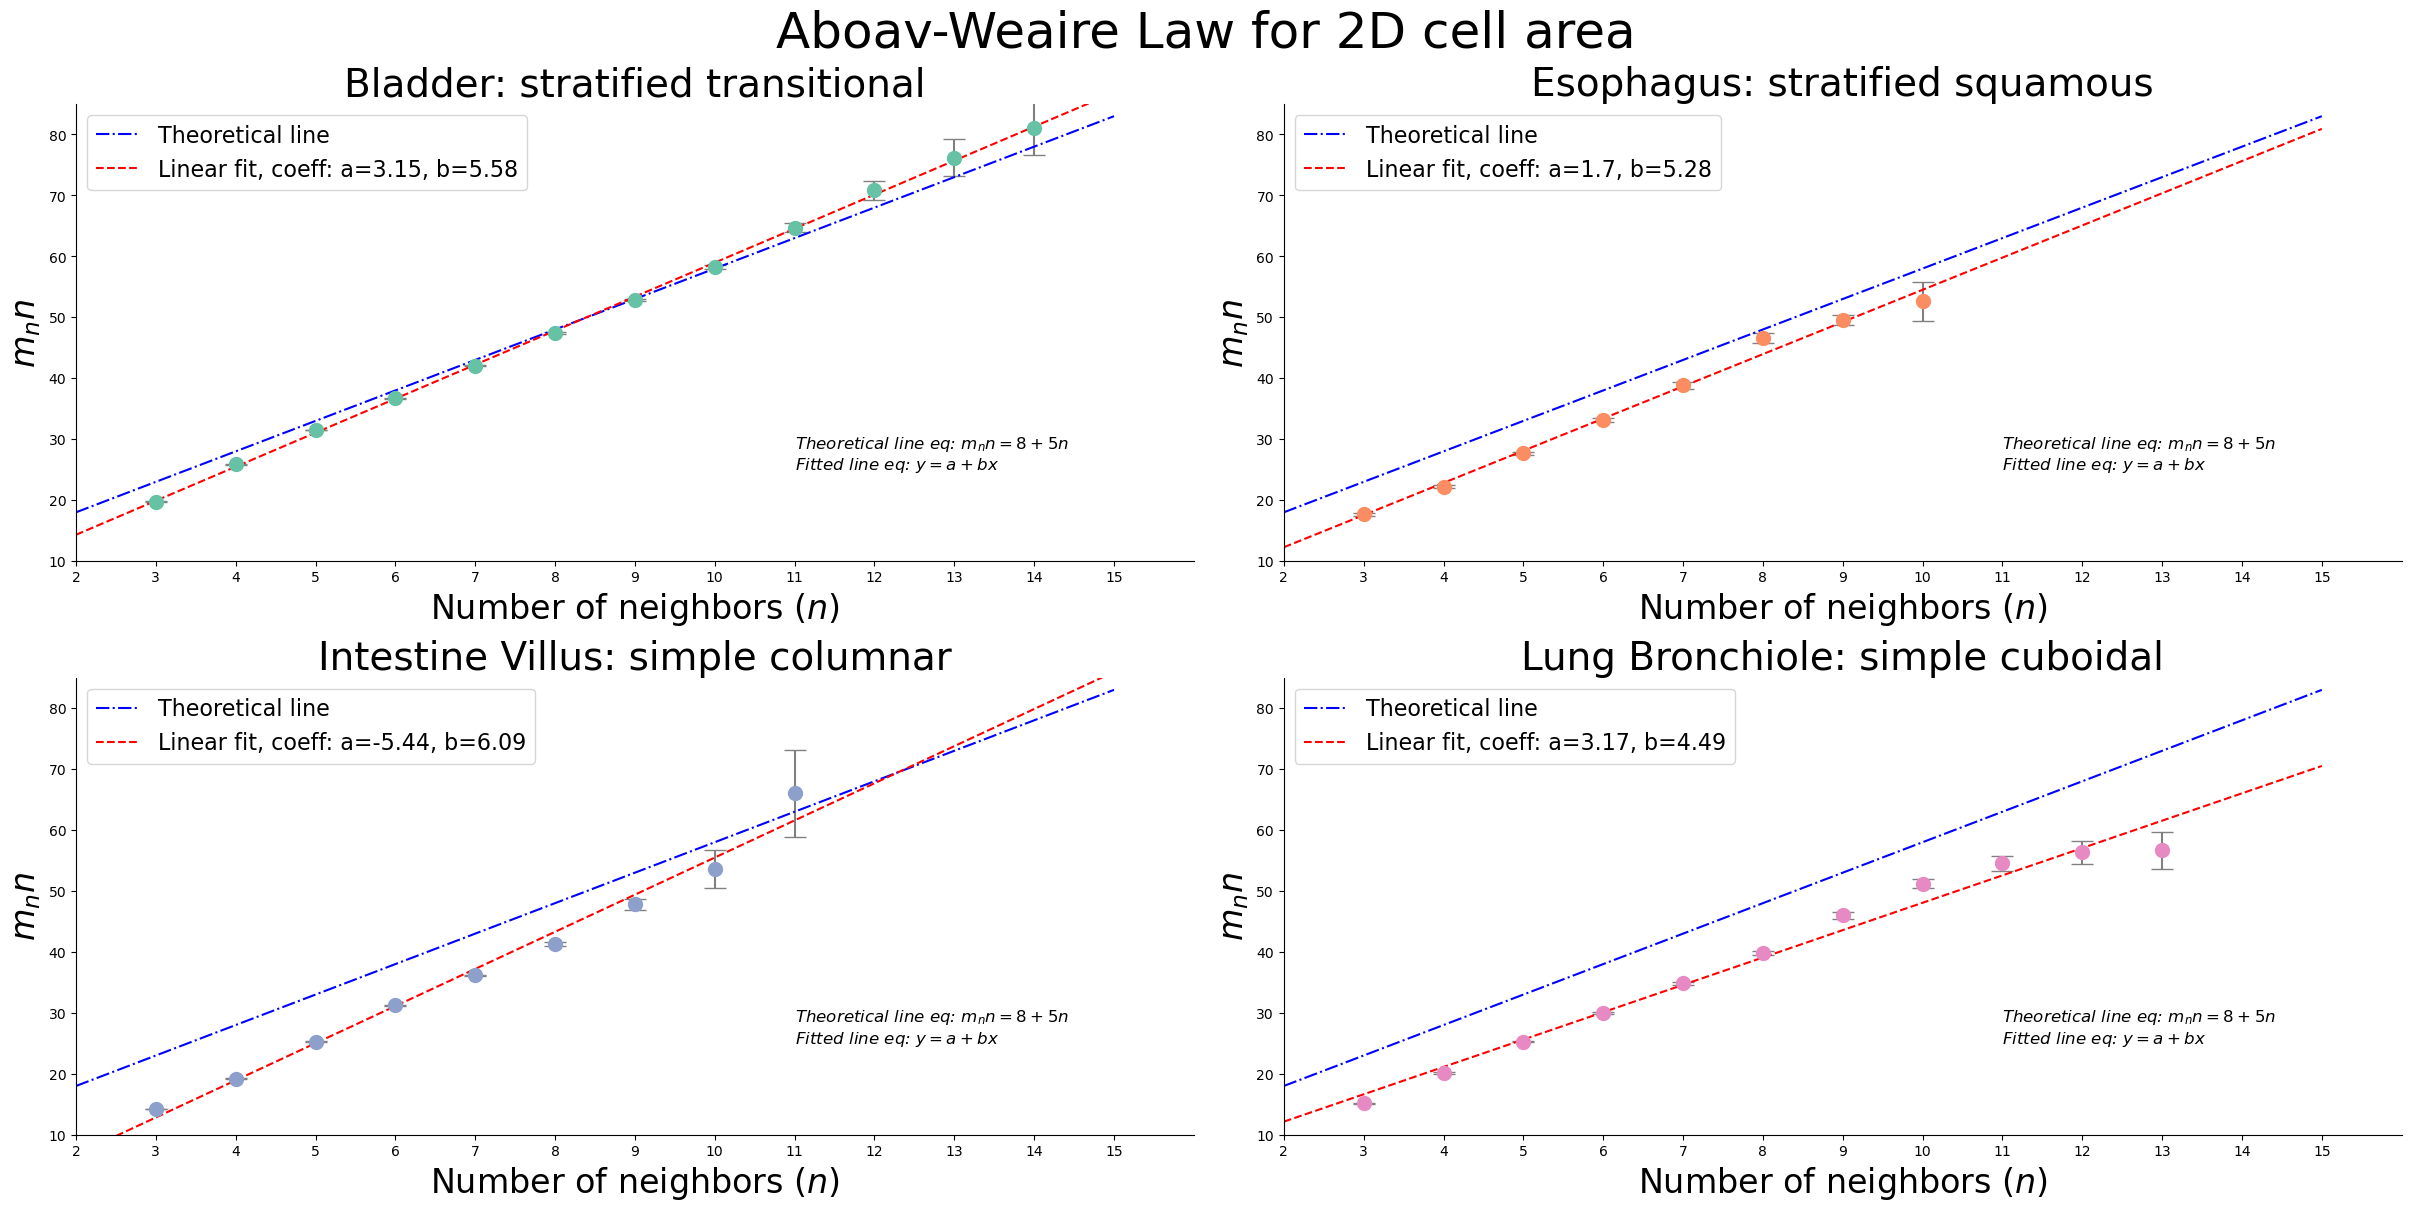

In [53]:
sp.aboav_wearie_2D_plots(
    df=cell_stats_df,
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)